# Chapter 2 Discussion: Statistical Paradoxes


Observation bias and sub-group differences can produce statistical paradoxes in any data science application. In Chapter 2, we saw the most common paradoxes encountered in causal inference. Let's discuss two examples in class.

### Example 1: Dating

Let’s assume that people have two independent characteristics: beauty and personality.   
If we plot this population as a scatter ploy, the population should look as randomly distributed on the looks-niceness plane. Each person is a point in this plane.

<AxesSubplot:xlabel='beauty', ylabel='personality'>

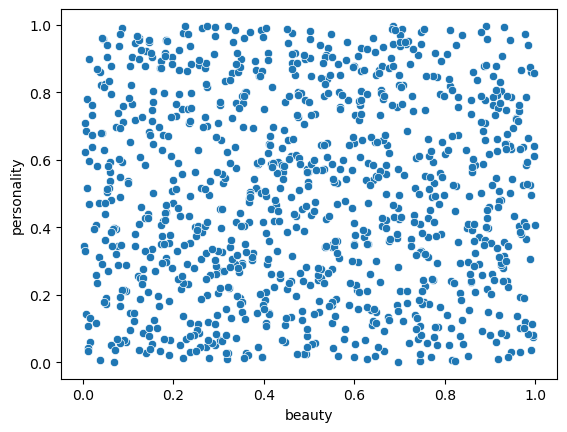

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate two independent characteristics (beauty,personality) in people
N_people = 1000
population = pd.DataFrame(data = {'beauty' : np.random.uniform(low = 0, high = 1, size = N_people),
                                  'personality' : np.random.uniform(low = 0, high = 1, size = N_people)})
sns.scatterplot(data=population, x = 'beauty', y = 'personality')

Let's assume that a girl wants to date a guy in the top right corner of the plot, which is a man that is both handsome and nice. 
However, if a guy is a jerk sometimes, she might still date him if he is really good-looking. 
Similarly, if a guy is really nice, she might still date him even if he is not so good-looking. 


Thus, by simplifying (a lot) the dating process, the guys that she is willing to date are probably where:

**Niceness + Handsomeness > a constant value**  (Orange points in the plot below)

<AxesSubplot:xlabel='beauty', ylabel='personality'>

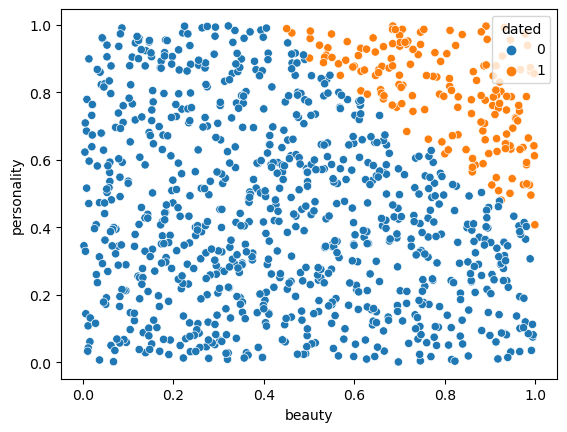

In [2]:
def dating_function(person, threshold = 1.4):
    if person['beauty'] + person['personality'] >= threshold:
        val = 1
    else:
        val = 0
    return val

population['dated'] = population.apply(dating_function, axis=1)

sns.scatterplot(data=population, x = 'beauty', y = 'personality', hue = 'dated')

By restricting herself to this set of guys, she sees a negative correlation between looks and niceness, **despite** these two variables being independent in the population!

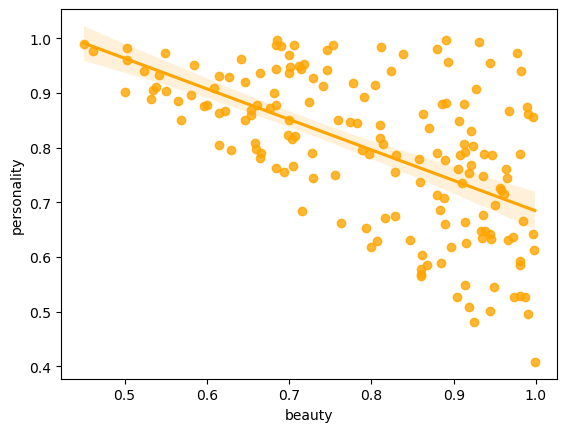

In [3]:
sns.regplot(x="beauty", y="personality", data=population[population['dated'] == 1], color="orange");

If we try to find a conclusion out of this study we could say that generally good-looking people are generally jerks and funny people and ugly. 

**Does it meake sense?**

Let's try with another "dating function"...

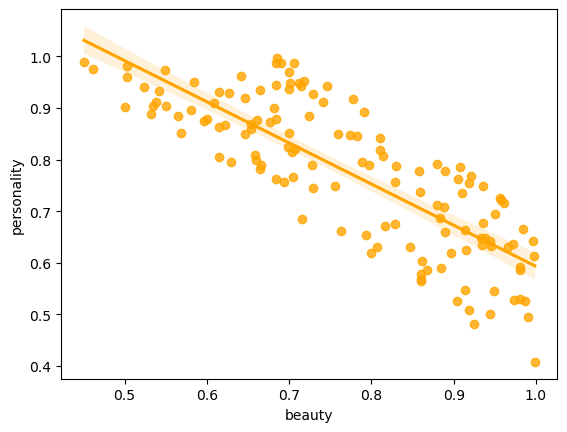

In [4]:
def dating_function_2(person, threshold_1 = 1.4, threshold_2 = 1.7):
    if person['beauty'] + person['personality'] >= threshold_1 and person['beauty'] + person['personality'] <= threshold_2:
        val = 1
    else:
        val = 0
    return val

population['dated'] = population.apply(dating_function_2, axis=1)

sns.regplot(x="beauty", y="personality", data=population[population['dated'] == 1], color="orange");

**It seems like the more we condition (i.e. observe) to a particular group, the more the independent variables become correlated!**

What is worse, is that it is possible that if we take into account another variable the correlation might be reversed again. This is why random controlled trials are so important for separating correlation and causation.

Here is a blog on [Are handsome men really jerks?](http://corysimon.github.io/articles/berksons-paradox-are-handsome-men-really-jerks/) that has a longer discussion egading this example.

</br></br>
## Example 2: Regression for Three Variables

An effective way to visualize a statistical paradox is considering a continuos distribution example. A simple example would be look at the covariance between two variables, $x$ and $y$, which is one sign for a collection of 3 subgroups, but a different sign for the whole population.

In [5]:
def generate_gaussian_simpsons_paradox(n_subgroups=3, n_samples=1000):

    overall_cov = 3*np.array([[1,0.9], [0.9,1]])

    means = np.random.multivariate_normal(mean=[0,0], cov=overall_cov, size=n_subgroups)
    
    weights = np.random.uniform(size=n_subgroups)
    weights /= np.sum(weights)
    covs = [np.random.uniform(0.2,0.8) for _ in range(n_subgroups)]
    covs = [np.array([[1,-c], [-c,1]]) for c in covs]


    samples = []

    for sg, (mean, cov, w) in enumerate(zip(means, covs, weights)):
        n = int(round(n_samples * w))
        sample = np.random.multivariate_normal(mean=mean, cov=cov, size=n)
        sample = pd.DataFrame(sample, columns=["x", "y"])
        sample["z"] = sg
        samples.append(sample)
        
    df = pd.concat(samples)
    
    return df



In [6]:
np.random.seed(1)

df = generate_gaussian_simpsons_paradox()
print("Total Covariance: {:.3f}".format(df[["x", "y"]].cov().iloc[0,1]))
for z in df.z.unique():
    print("Subgroup {} covariance: {:.3f}".format(z,df[df.z==z][["x", "y"]].cov().iloc[0,1]))

Total Covariance: 2.237
Subgroup 0 covariance: -0.688
Subgroup 1 covariance: -0.252
Subgroup 2 covariance: -0.604


The total population has positive covariance. But subgroups show negative covariance! 
This can be clear if we plot the overall population and subgroups separately.

For the overall population, there is a positive correlation between $x$ and $y$:

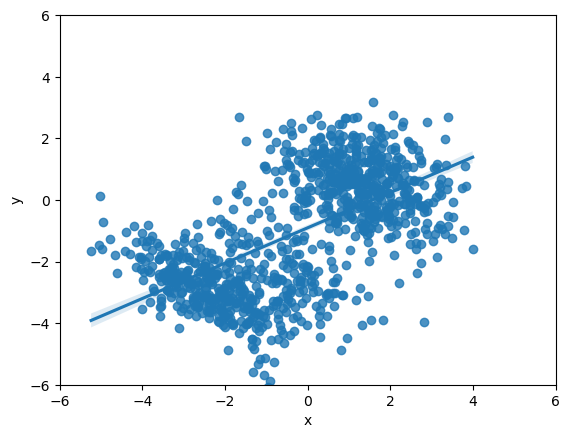

In [7]:
sns.regplot(data=df, x="x", y="y");
plt.xlim(-6,6);
plt.ylim(-6,6);

However for each subpopulation, the correlation is negative!

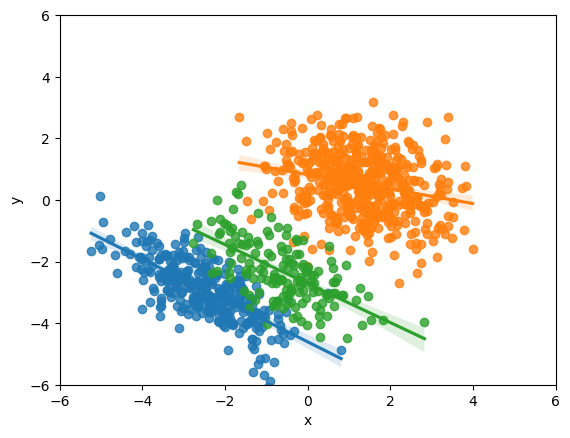

In [8]:
fig, ax = plt.subplots()

plt.xlim(-6,6);
plt.ylim(-6,6);

for z in df.z.unique():
    sns.regplot(data=df[df.z==z], x="x", y="y", ax=ax)

**Do we need to look at the data as a whole or as a group?**
**What paradox is this?**

### Homework

Form groups and find similar examples and present it in a short jupyter notebook with propoer introduction and explanation
(you can use ChatGPT or similar tools but with acknowledgement).

You can go beyond the Simpson and Berkson biases we saw in this lecture and investigate other type of common biases, for example check  the [ Oxford's Catalog of Bias](https://catalogofbias.org).
